
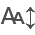

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

In [2]:
df = pd.read_csv("data/wos.csv")
df = df.drop(columns=["language"])
df

id  citations_wos  citations_all  \
0      WOS:000463389200001             38             42   
1      WOS:000467089500001             98            111   
2      WOS:000467105900001             12             12   
3      WOS:000467108000001              7              7   
4      WOS:000468848800001              5              6   
...                    ...            ...            ...   
33291  WOS:001356680300001              0              0   
33292  WOS:001356709300001              0              0   
33293  WOS:001357139600001              0              0   
33294  WOS:001357469400001              0              0   
33295  WOS:001357961200001              0              0   

                           open_access  year  
0                                  NaN  2020  
1                                  NaN  2020  
2      Green Accepted, Green Submitted  2020  
3                                  NaN  2020  
4                      Green Submitted  2020  
...                                ...   ...  
33291                              NaN  2024  
33292                              NaN  2024  
33293           Green Accepted, hybrid  2024  
33294                           hybrid  2024  
33295                           hybrid  2024  

[33296 rows x 5 columns]

In [3]:
df['open_access'] = df['open_access'].apply(

    lambda x: x.split(', ') if isinstance(x, str) else np.nan

)
df

id  citations_wos  citations_all  \
0      WOS:000463389200001             38             42   
1      WOS:000467089500001             98            111   
2      WOS:000467105900001             12             12   
3      WOS:000467108000001              7              7   
4      WOS:000468848800001              5              6   
...                    ...            ...            ...   
33291  WOS:001356680300001              0              0   
33292  WOS:001356709300001              0              0   
33293  WOS:001357139600001              0              0   
33294  WOS:001357469400001              0              0   
33295  WOS:001357961200001              0              0   

                             open_access  year  
0                                    NaN  2020  
1                                    NaN  2020  
2      [Green Accepted, Green Submitted]  2020  
3                                    NaN  2020  
4                      [Green Submitted]  2020  
...                                  ...   ...  
33291                                NaN  2024  
33292                                NaN  2024  
33293           [Green Accepted, hybrid]  2024  
33294                           [hybrid]  2024  
33295                           [hybrid]  2024  

[33296 rows x 5 columns]

In [5]:
open_access = df.loc[df["open_access"].notna()]
open_access

id  citations_wos  citations_all  \
2      WOS:000467105900001             12             12   
4      WOS:000468848800001              5              6   
8      WOS:000470447800001              7              7   
10     WOS:000470589500001             14             19   
12     WOS:000471384000001             20             20   
...                    ...            ...            ...   
33288  WOS:001356346700001              0              0   
33290  WOS:001356495200001              0              0   
33293  WOS:001357139600001              0              0   
33294  WOS:001357469400001              0              0   
33295  WOS:001357961200001              0              0   

                             open_access  year  
2      [Green Accepted, Green Submitted]  2020  
4                      [Green Submitted]  2020  
8                      [Green Submitted]  2020  
10             [hybrid, Green Published]  2020  
12             [hybrid, Green Submitted]  2020  
...                                  ...   ...  
33288                           [hybrid]  2024  
33290                  [Green Submitted]  2024  
33293           [Green Accepted, hybrid]  2024  
33294                           [hybrid]  2024  
33295                           [hybrid]  2024  

[12591 rows x 5 columns]

In [16]:
open_access.describe()

citations_wos  citations_all          year
count   12591.000000   12591.000000  12591.000000
mean        9.675482      10.295290   2022.068620
std        32.679355      35.092041      1.368043
min         0.000000       0.000000   2020.000000
25%         0.000000       0.000000   2021.000000
50%         3.000000       3.000000   2022.000000
75%         9.000000       9.000000   2023.000000
max      1079.000000    1128.000000   2025.000000

In [6]:
closed_access = df.loc[df["open_access"].isna()]
closed_access

id  citations_wos  citations_all open_access  year
0      WOS:000463389200001             38             42         NaN  2020
1      WOS:000467089500001             98            111         NaN  2020
3      WOS:000467108000001              7              7         NaN  2020
5      WOS:000469665200001             25             26         NaN  2020
6      WOS:000469722500001             21             25         NaN  2020
...                    ...            ...            ...         ...   ...
33286  WOS:001356326200003              0              0         NaN  2024
33287  WOS:001356326200004              0              0         NaN  2024
33289  WOS:001356464700001              0              0         NaN  2024
33291  WOS:001356680300001              0              0         NaN  2024
33292  WOS:001356709300001              0              0         NaN  2024

[20705 rows x 5 columns]

In [17]:
closed_access.describe()

citations_wos  citations_all          year
count   20705.000000   20705.000000  20705.000000
mean        7.505144       7.946438   2022.121227
std        19.066367      20.023194      1.432331
min         0.000000       0.000000   2017.000000
25%         0.000000       0.000000   2021.000000
50%         2.000000       2.000000   2022.000000
75%         8.000000       8.000000   2023.000000
max       788.000000     813.000000   2025.000000

In [14]:
from collections import Counter

# Flatten the open_access column and count the occurrences of each full level description
open_access_levels = df['open_access'].dropna().explode()
level_counts = Counter(open_access_levels)

# Print the results
print("Number of Papers Published in Each Open Access Level:")
for level, count in level_counts.items():
    print(f"{level}: {count}")

Number of Papers Published in Each Open Access Level:
Green Accepted: 1405
Green Submitted: 2208
hybrid: 4870
Green Published: 3762
Bronze: 1117
gold: 3648


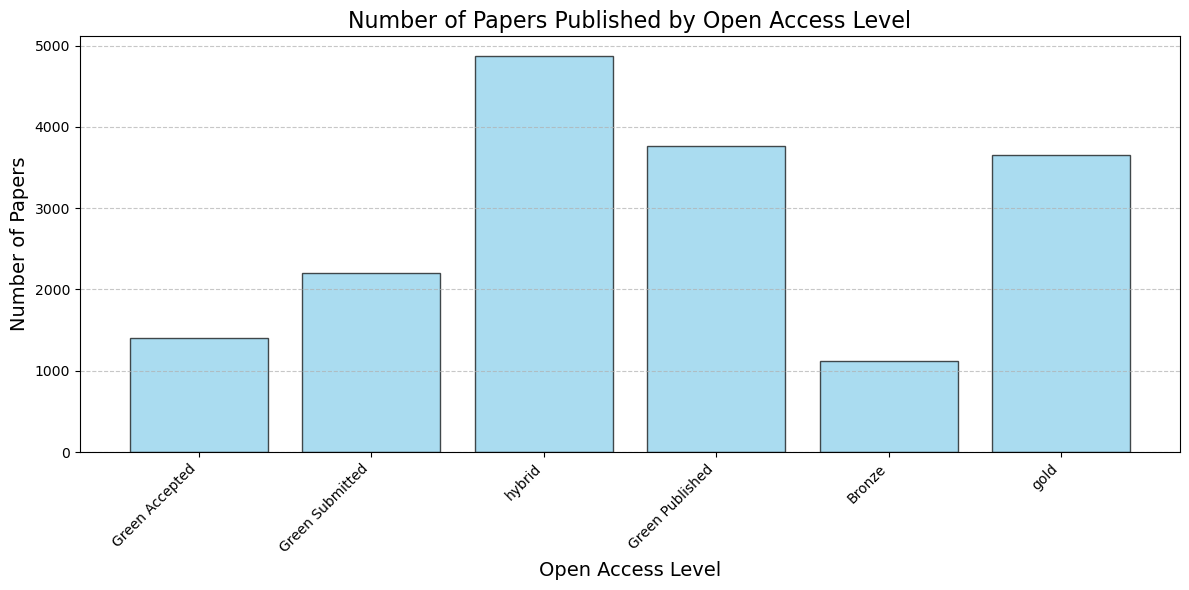

In [15]:
from collections import Counter

# Flatten the open_access column and count the occurrences of each full level description
open_access_levels = df['open_access'].dropna().explode()
level_counts = Counter(open_access_levels)

# Convert counts to lists for plotting
labels = list(level_counts.keys())
counts = list(level_counts.values())

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(labels, counts, color='skyblue', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Number of Papers Published by Open Access Level', fontsize=16)
plt.xlabel('Open Access Level', fontsize=14)
plt.ylabel('Number of Papers', fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [5]:
miu_open = open_access["citations_all"].mean()
miu_open

10.295290286712731

In [6]:
miu_closed = closed_access["citations_all"].mean()
miu_closed

7.94643805843999

In [7]:
import statistics
stddev_open = statistics.stdev(open_access["citations_all"])
stddev_closed = statistics.stdev(closed_access["citations_all"])

In [8]:
import math
test_stat = (miu_open - miu_closed)/(math.sqrt(((stddev_open)**2/len(open_access))+((stddev_closed)**2/len(closed_access))))

In [9]:
test_stat

6.862009477543501

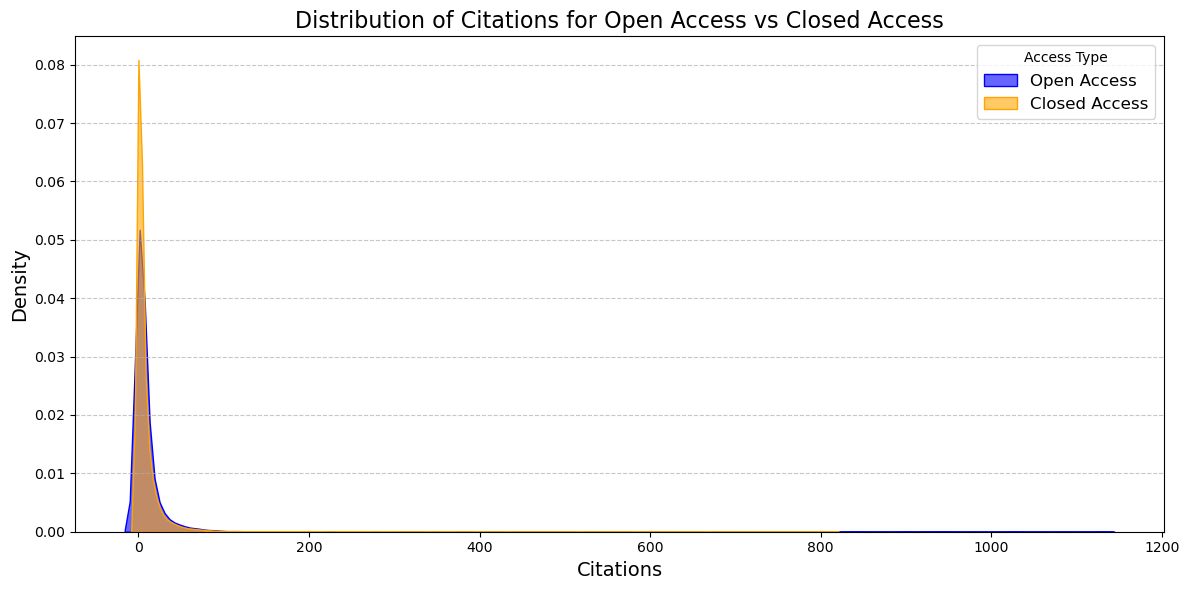

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate data into open access and closed access groups
open_access_citations = df[df['open_access'].notna()]['citations_all']
closed_access_citations = df[df['open_access'].isna()]['citations_all']

# Plot density distributions
plt.figure(figsize=(12, 6))
sns.kdeplot(open_access_citations, label='Open Access', fill=True, color='blue', alpha=0.6)
sns.kdeplot(closed_access_citations, label='Closed Access', fill=True, color='orange', alpha=0.6)

# Add titles and labels
plt.title('Distribution of Citations for Open Access vs Closed Access', fontsize=16)
plt.xlabel('Citations', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Access Type', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()